# ZINC reference database analysis

In [6]:
#Libraries
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from rdkit.Chem import rdMolDescriptors as rdescriptors
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from rdkit import RDLogger 
RDLogger.DisableLog('rdApp.*') 

In [39]:
#Loading coconut database from sdf format
coco = Chem.SDMolSupplier('COCONUT_DB.sdf')
coco_d = [m for m in coco if m]

In [22]:
#Loading zinc database from csv 
suppl_csv = pd.read_csv('ZINC_csv1/ZINCALL.csv', delimiter = ' ')
suppl_csv

,Smiles,zinc_id
0,N=C(N)NCC[C@H](N)C(=O)O,1589384
1,CN(C)CC(=O)NCC(=O)O,83822513
2,O=C(O)CN1CCCNS1(=O)=O,214763687
3,O=C(O)[C@@H]1C[C@H]2O[C@H]1[C@H](O)[C@H]2O,306392345
4,N[C@@H]1N=C2N=C(O)N=C2C(=O)N1,85343607
...,...,...
379017,Cc1ccc(C(=O)N(c2ccc(N(C(=O)c3ccc(C)cc3)S(=O)(=...,97986502
379018,CCc1c(-c2ccc(OC)c(OC)c2)nn(-c2nc(-c3ccc(C)cc3)...,97948800
379019,Cc1cc(N2CCN(CCOc3cccc4ccccc34)CC2)n2nc(C)c(-c3...,54274624
379020,CCOc1cc(CNc2cc(Cl)ccc2C)cc(I)c1OCc1ccccc1Cl,2093448


In [9]:
#Number of zinc products
len(suppl_csv)

379022

In [23]:
# List of molecular weights of zinc products
ligandm_database = []
for ligand in suppl_csv["Smiles"]:
		ligandm_database.append(Chem.MolFromSmiles(ligand))
#List of MW from csv
db_MW_z = []
for substance in ligandm_database:
		db_MW_z.append(rdescriptors.CalcExactMolWt(substance))
print(len(db_MW_z))
#List of logP from csv
db_logP_z = []
for substance in ligandm_database:
		db_logP_z.append(Descriptors.MolLogP(substance))
print(len(db_logP_z))


379022
379022


In [51]:
#List of INCHI from csv
db_Inchi_z = []
for substance in ligandm_database:
		db_Inchi_z.append(Chem.MolToInchiKey(substance).split('-')[0])
print(len(db_Inchi_z))

379022


In [52]:
#Creating dataframe of logP and MW value of ZINC products
df_ZINC = pd.DataFrame(data={'MW': db_MW_z,'logP': db_logP_z, 'Smiles': suppl_csv['Smiles'], 'Inchi_s': db_Inchi_z})
                    
df_ZINC['name'] = "ZINC"
df_ZINC

,MW,logP,Smiles,Inchi_s,name
0,160.096026,-1.72853,N=C(N)NCC[C@H](N)C(=O)O,IFPQOXNWLSRZKX,ZINC
1,160.084792,-1.25120,CN(C)CC(=O)NCC(=O)O,HQFNONZTUQSPJS,ZINC
2,194.036128,-1.38890,O=C(O)CN1CCCNS1(=O)=O,KCIDTUHJDPZBTQ,ZINC
3,174.052823,-1.41990,O=C(O)[C@@H]1C[C@H]2O[C@H]1[C@H](O)[C@H]2O,ZZTJOHOETCDWML,ZINC
4,167.044324,-1.87440,N[C@@H]1N=C2N=C(O)N=C2C(=O)N1,OSXQHYVRCFCLQV,ZINC
...,...,...,...,...,...
379017,636.051720,6.49784,Cc1ccc(C(=O)N(c2ccc(N(C(=O)c3ccc(C)cc3)S(=O)(=...,KYPDAVIHIYTGQW,ZINC
379018,604.229740,7.58732,CCc1c(-c2ccc(OC)c(OC)c2)nn(-c2nc(-c3ccc(C)cc3)...,AWQWFNRTEBAZJO,ZINC
379019,511.213888,6.02074,Cc1cc(N2CCN(CCOc3cccc4ccccc34)CC2)n2nc(C)c(-c3...,HAHVCBFPDRUVIL,ZINC
379020,541.007232,7.49622,CCOc1cc(CNc2cc(Cl)ccc2C)cc(I)c1OCc1ccccc1Cl,IYFPBZIIJDRXMB,ZINC


In [25]:
#Statistic of ZINC'S logP values
df_ZINC["logP"].describe()

count    379022.000000
mean          3.323813
std           2.144468
min         -17.490700
25%           1.922000
50%           3.280900
75%           4.807385
max          21.151800
Name: logP, dtype: float64

In [26]:
#Standard deviation of logP
df_ZINC["logP"].std()

2.144467745276283

In [27]:
#Statistic of ZINC'S MW values
df_ZINC["MW"].describe()

count    379022.000000
mean        406.080862
std         125.093577
min          54.010565
25%         318.107653
50%         403.120192
75%         503.187877
max        1001.254949
Name: MW, dtype: float64

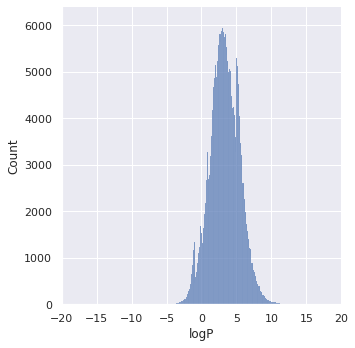

In [28]:
#Histogram of logP value of products
sns.displot(df_ZINC, x="logP" )
plt.xlim(-20, 20);

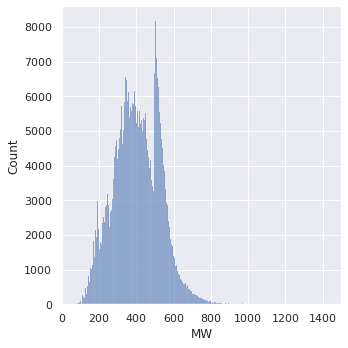

In [29]:
#Histogram of MW value of products
sns.displot(df_ZINC, x="MW" )
plt.xlim(0, 1500);

<AxesSubplot:>

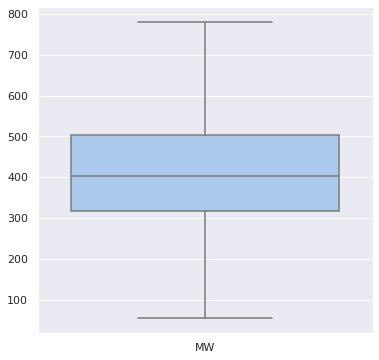

In [30]:
#Boxplot of ZINC'S MW values
sns.set(rc={'figure.figsize':(6, 6)})
sns.boxplot(data=df_ZINC[['MW']], 
            palette = "pastel", 
            
            showfliers = False)

<AxesSubplot:>

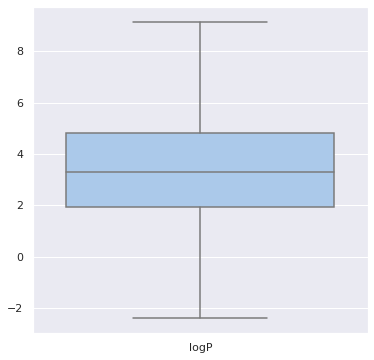

In [31]:
#Boxplot of ZINC'S logP values
sns.set(rc={'figure.figsize':(6, 6)})
sns.boxplot(data=df_ZINC[['logP']], 
            palette = "pastel", 
            showfliers = False)

In [32]:
print(len(df_ZINC))

379022


In [33]:
print(len(df_ZINC.loc[(df_ZINC['MW'] > 200) & (df_ZINC['MW']<=250)]))

23200


In [34]:

intervals = (0,200),(200,250),(250,300),(300,325),(325,350),(350,375),(375,400),(400,425),(425,450),(450,500),(500, 3500)
numbers = []
for count, value in enumerate(intervals):
    numbers.append(len(df_ZINC.loc[(df_ZINC['MW'] > intervals[count][0]) & (df_ZINC['MW']<= intervals[count][1])]))
numbers

[20703, 23200, 34154, 24202, 27452, 28627, 27680, 26992, 25513, 39797, 100702]

In [35]:
intervals_MW = (0,200),(200,250),(250,300),(300,325),(325,350),(350,375),(375,400),(400,425),(425,450),(450,500),(500, 3500)
intervals_logP = (-34,-1),(-1,0),(0,1),(1,2),(2,2.5),(2.5,3),(3,3.5),(3.5,4),(4,4.5),(4.5,5),(5, 50)
names = ['MW_0-200','MW_200-250','MW_250-300','MW_300-325','MW_325-350','MW_350-375','MW_375-400','MW_400-425','MW_425-450','MW_450-500','MW_500-3500']


def MW(intervals):
    return df_ZINC.loc[(df_ZINC['MW'] > intervals[0]) & (df_ZINC['MW'] <= intervals[1])]  

df_MW_0_200 = MW([0,200])
df_MW_200_250 = MW([200,250])
df_MW_250_300 = MW([250,300])
df_MW_300_325 = MW([300,325])
df_MW_325_350 = MW([325,350])
df_MW_350_375 = MW([350,375])
df_MW_375_400 = MW([375,400])
df_MW_400_425 = MW([400,425])
df_MW_425_450 = MW([425,450])
df_MW_450_500 = MW([450,500])
df_MW_500_3500 = MW([500,3500])


In [36]:
intervals_MW = (0,200),(200,250),(250,300),(300,325),(325,350),(350,375),(375,400),(400,425),(425,450),(450,500),(500, 3500)
intervals_logP = (-34,-1),(-1,0),(0,1),(1,2),(2,2.5),(2.5,3),(3,3.5),(3.5,4),(4,4.5),(4.5,5),(5, 50)

def logP(df):
    num = []
    for count, value in enumerate(intervals_logP):
        num.append(len(df.loc[(df['logP'] > intervals_logP[count][0]) & (df['logP']<= intervals_logP[count][1])]))
    return num
    
df_logP_1 = logP(df_MW_0_200)
df_logP_2 = logP(df_MW_200_250)
df_logP_3 = logP(df_MW_250_300)
df_logP_4 = logP(df_MW_300_325) 
df_logP_5 = logP(df_MW_325_350)
df_logP_6 = logP(df_MW_350_375) 
df_logP_7 = logP(df_MW_375_400)
df_logP_8 = logP(df_MW_400_425) 
df_logP_9 = logP(df_MW_425_450)
df_logP_10 = logP(df_MW_450_500) 
df_logP_11 = logP(df_MW_500_3500)
numbers

[20703, 23200, 34154, 24202, 27452, 28627, 27680, 26992, 25513, 39797, 100702]

In [37]:
my_array =np.stack([df_logP_1, df_logP_2, df_logP_3,df_logP_4,df_logP_5,df_logP_6,df_logP_7,df_logP_8,df_logP_9,df_logP_10, df_logP_11], axis=1)

In [38]:
df_array = pd.DataFrame(my_array, columns = ['200','250','300','325','350','375','400','425', '450','500','>500'],
                        index=['-1', '0','1','2','2.5','3','3.5','4','4.5','5','>5'])
df_array

,200,250,300,325,350,375,400,425,450,500,>500
-1,1588,983,1277,793,1092,942,744,456,324,464,1455
0,2226,1195,1333,815,949,843,948,922,925,1145,1830
1,5031,2456,3054,1601,1749,1768,1749,1604,1524,2343,4795
2,5854,4778,6566,3455,3637,4155,3537,2995,2191,3174,8811
2.5,2446,3092,4563,2406,2941,3037,2606,2306,1698,2237,4931
3,1844,3366,4678,2996,3758,3606,3146,2748,2068,2764,5603
3.5,1040,2599,4184,3137,3720,3620,3252,2979,2490,3379,6072
4,430,2197,2901,2754,3132,3216,2959,2942,2616,3634,6180
4.5,184,1361,1973,2612,2500,2681,2641,2710,2603,3965,6505
5,50,812,1355,1784,1669,1835,1978,2521,2304,3751,6394


In [40]:
# List of molecular weights of natural products
db_mw = []
for substance in coco_d:
		db_mw.append(rdescriptors.CalcExactMolWt(substance))

In [41]:
# List of molecular octanol-water partition coefficient
db_logP = []
for substance in coco_d:
		db_logP.append(Descriptors.MolLogP(substance))

In [42]:
#List of smiles
db_smiles = []
for substance in coco_d:
		db_smiles.append(Chem.MolToSmiles(substance))

In [43]:
#List of Inchi
db_Inchi = []
for substance in coco_d:
		db_Inchi.append(substance.GetProp('inchi'))

In [53]:
db_inchikey = []
for substance in coco_d:
		db_inchikey.append(Chem.MolToInchiKey(substance).split('-')[0])

In [54]:
#Creating dataframe of logP and MW value of COCONUT products
df_COCO = pd.DataFrame(data={'MW': db_mw,'logP': db_logP , 'Smiles': db_smiles, 'Inchi': db_Inchi, 'Inchi_s':db_inchikey})
df_COCO['name'] = "COCO"
df_COCO

,MW,logP,Smiles,Inchi,Inchi_s,name
0,660.183639,-2.08210,CC=C(N=CS)C(=O)OC1C(COC(C)=O)OC(C2(O)CC(=O)C(N...,InChI=1S/C27H36N2O15S/c1-5-12(29-9-45)26(37)44...,FJEMIESGEMWDOB,COCO
1,598.183897,3.63422,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...,InChI=1S/C34H30O10/c1-14-10-16-24(21(11-14)42-...,KLWKJVYCDFWQMK,COCO
2,554.157682,3.32262,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...,InChI=1S/C32H26O9/c1-13-9-16-24(20(10-13)39-2)...,PTEKHLCNKCAXPH,COCO
3,534.298139,6.87940,CC1(C)CC2C(OC(=O)c3ccccc3)C(OC(=O)c3ccccc3)CC(...,"InChI=1S/C33H42O6/c1-31(2,3)30(36)37-18-17-33(...",ZVAVQCZAGOKAMX,COCO
4,540.142032,3.01962,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(O)c5c4C(...,InChI=1S/C31H24O9/c1-12-8-15-23(20(9-12)39-2)3...,UYIPOCQHTAYRMA,COCO
...,...,...,...,...,...,...
405955,216.078644,2.75660,COc1cccc2ccc(C(C)=O)c(O)c12,InChI=1S/C13H12O3/c1-8(14)10-7-6-9-4-3-5-11(16...,XNWOWNYWQOTWIX,COCO
405956,570.188983,4.77902,COc1cc(OC)c2c(c1)C(OC)(c1ccc3c(c1O)C(=O)c1c(O)...,InChI=1S/C33H30O9/c1-14-9-19-26(23(34)10-14)32...,XWGVAZYMLDVIDS,COCO
405957,420.157288,4.82510,CC1(C)C=Cc2cc(C3COc4c5c(cc(O)c4C3=O)OC(C)(C)C=...,InChI=1S/C25H24O6/c1-24(2)7-5-13-9-15(17(26)10...,XZXMEYSQXQNHCX,COCO
405958,1183.685261,-1.20930,CCCCCCCC1CC(=O)NC(CO)C(=O)NC(CO)C(=O)N2CCCC2C(...,InChI=1S/C58H93N11O15/c1-8-11-12-13-14-17-37-2...,YNLIJTVZSFUHKP,COCO


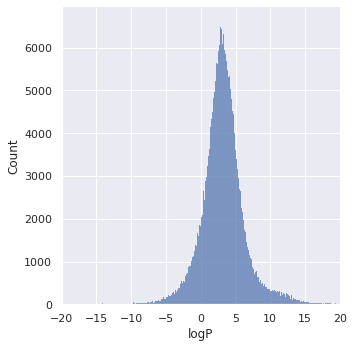

In [45]:
#Histogram of logP value of products
sns.displot(df_COCO, x="logP" )
plt.xlim(-20, 20);

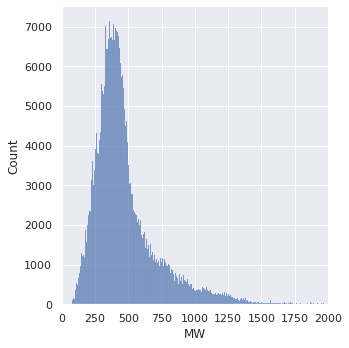

In [46]:
#Histogram of MW value of products
sns.displot(df_COCO, x="MW" )
plt.xlim(0, 2000);

In [62]:
#Join ZINC and COCONUT data
df_merge = pd.concat([df_COCO,df_ZINC], axis=0)
df_merge

,MW,logP,Smiles,Inchi,Inchi_s,name
0,660.183639,-2.08210,CC=C(N=CS)C(=O)OC1C(COC(C)=O)OC(C2(O)CC(=O)C(N...,InChI=1S/C27H36N2O15S/c1-5-12(29-9-45)26(37)44...,FJEMIESGEMWDOB,COCO
1,598.183897,3.63422,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...,InChI=1S/C34H30O10/c1-14-10-16-24(21(11-14)42-...,KLWKJVYCDFWQMK,COCO
2,554.157682,3.32262,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...,InChI=1S/C32H26O9/c1-13-9-16-24(20(10-13)39-2)...,PTEKHLCNKCAXPH,COCO
3,534.298139,6.87940,CC1(C)CC2C(OC(=O)c3ccccc3)C(OC(=O)c3ccccc3)CC(...,"InChI=1S/C33H42O6/c1-31(2,3)30(36)37-18-17-33(...",ZVAVQCZAGOKAMX,COCO
4,540.142032,3.01962,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(O)c5c4C(...,InChI=1S/C31H24O9/c1-12-8-15-23(20(9-12)39-2)3...,UYIPOCQHTAYRMA,COCO
...,...,...,...,...,...,...
379017,636.051720,6.49784,Cc1ccc(C(=O)N(c2ccc(N(C(=O)c3ccc(C)cc3)S(=O)(=...,NaN,KYPDAVIHIYTGQW,ZINC
379018,604.229740,7.58732,CCc1c(-c2ccc(OC)c(OC)c2)nn(-c2nc(-c3ccc(C)cc3)...,NaN,AWQWFNRTEBAZJO,ZINC
379019,511.213888,6.02074,Cc1cc(N2CCN(CCOc3cccc4ccccc34)CC2)n2nc(C)c(-c3...,NaN,HAHVCBFPDRUVIL,ZINC
379020,541.007232,7.49622,CCOc1cc(CNc2cc(Cl)ccc2C)cc(I)c1OCc1ccccc1Cl,NaN,IYFPBZIIJDRXMB,ZINC


In [65]:
#Check dplicate in both dataframes by Inchi
ids = df_merge['Inchi_s']
df_merge = df_merge[ids.isin(ids[ids.duplicated()])].sort_values('Inchi_s')
df_merge = df_merge[df_merge.name != 'COCO']
print(len(df_merge))

20


In [48]:
#Let's split the dataframe into intervals
intervals = (0,200),(200,250),(250,300),(300,325),(325,350),(350,375),(375,400),(400,425),(425,450),(450,500),(500, 3500)
numbers_coco = []
for count, value in enumerate(intervals):
    numbers_coco.append(len(df_COCO.loc[(df_COCO['MW'] > intervals[count][0]) & (df_COCO['MW']<= intervals[count][1])]))
numbers_coco


[20733, 23172, 34127, 24327, 27387, 28633, 27732, 28910, 26016, 40637, 124286]

In [49]:
numbers

[20703, 23200, 34154, 24202, 27452, 28627, 27680, 26992, 25513, 39797, 100702]

In [50]:
diff= []
for count,x in enumerate(numbers_coco):
    diff.append(x - numbers[count])
    
diff

[30, -28, -27, 125, -65, 6, 52, 1918, 503, 840, 23584]